In [3]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from pandas.io.json import json_normalize

In [179]:
# Se hace la conexión
cliente = pymongo.MongoClient()

In [180]:
cliente.list_database_names()

['admin', 'companies', 'config', 'local']

In [181]:

db = cliente.companies
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies')

In [182]:
db.collection_names()

<ipython-input-182-8ff4d2505e25>:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  db.collection_names()


['collection', 'o', 'companies']

In [183]:
len(list(db.collection.find()))

18801

In [184]:


l  = list(db.collection.find(
    { },
    {'category_code':  1}
))


In [185]:
df = pd.DataFrame(l)
df

,_id,category_code
0,52cdef7c4bab8bd675297d8a,web
1,52cdef7c4bab8bd675297d8b,enterprise
2,52cdef7c4bab8bd675297d8c,software
3,52cdef7c4bab8bd675297d8d,news
4,52cdef7c4bab8bd675297d8e,social
...,...,...
18796,52cdef7f4bab8bd67529c6f6,advertising
18797,52cdef7f4bab8bd67529c6f7,software
18798,52cdef7f4bab8bd67529c6f8,web
18799,52cdef7f4bab8bd67529c6f9,software


C:\Users\cyn_n\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <BarContainer object of 41 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


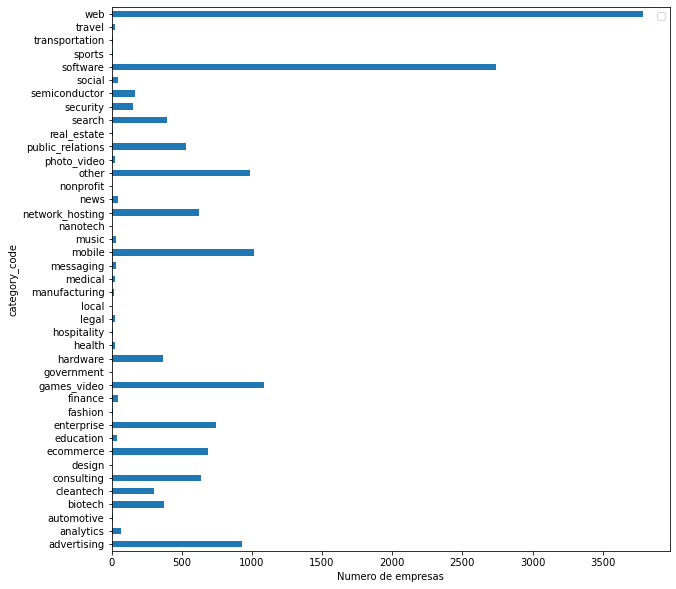

42

In [251]:
#f.groupby(df['category_code'])[df['category_code']].count()
#La mayor categoria que tienen mayor numero de empresas es, web seguida por software.
vehicles_mean1 = df.groupby(["category_code"]).agg("count")
fig = vehicles_mean.plot.barh(figsize=(10,10))
fig.set_xlabel('Numero de empresas')
plt.show()
len(vehicles_mean1)

In [188]:
#De las que tiene menor empresas por categoria es gobierno local y diseño, la 17 es analyc y finanza esta en el numero 16 y 17 de 
#41 categorias.
diez = vehicles_mean.sort_values(by='_id', ascending=False)
d = diez[:17]
d1 = diez[17:]
d1


,_id
category_code,
analytics,66
finance,49
social,49
news,48
education,36
music,33
messaging,30
travel,25
medical,25


C:\Users\cyn_n\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <BarContainer object of 17 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


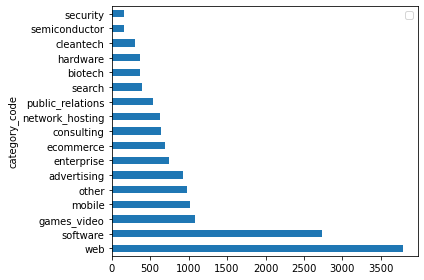

C:\Users\cyn_n\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <BarContainer object of 24 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


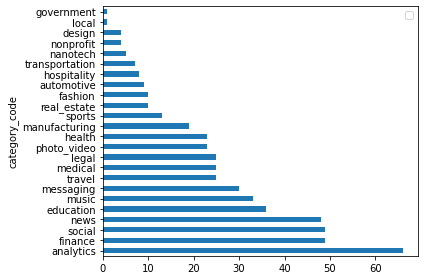

In [189]:
 d = pd.DataFrame(d)
    
    
d.plot.barh()
plt.tight_layout()
plt.show()

d1.plot.barh()
plt.tight_layout()
plt.show()



In [23]:

var = list(db.collection.find(
    { },
    {  'name': 1,'number_of_employees': 1, 'founded_year': 1, '_id': 0 ,'category_code':1,'description':1,'total_money_raised':1,'deadpooled_year':1}
))

In [191]:
df = pd.DataFrame(var)
df

,name,category_code,number_of_employees,founded_year,deadpooled_year,description,total_money_raised
0,Wetpaint,web,47.0,2005.0,1.0,Technology Platform Company,$39.8M
1,AdventNet,enterprise,600.0,1996.0,2.0,Server Management Software,$0
2,Zoho,software,1600.0,2005.0,3.0,Online Business Apps Suite,$0
3,Digg,news,60.0,2004.0,NaN,user driven social content website,$45M
4,Facebook,social,5299.0,2004.0,NaN,Social network,$2.43B
...,...,...,...,...,...,...,...
18796,Adhunk,advertising,3.0,2009.0,NaN,Online Admanager,$0
18797,AfterLogic,software,NaN,2002.0,NaN,.NET Email Components and Webmail,$0
18798,goBookmaker,web,NaN,NaN,NaN,Create your own sportsbook,$0
18799,EnteGreat Solutions,software,NaN,NaN,NaN,,$0


In [192]:
df = df.fillna(0)

In [193]:
df['Dead'] = np.where(df['deadpooled_year'] !=0, 1,0)

In [197]:
df
f =df.copy()

In [249]:
d3 = df[df['Dead'] == 1 ]

n = d3.groupby(["category_code"]).agg("count")
n
mylabels = list(n.index) 
y =n['Dead']


In [250]:
result1 = pd.merge(y, vehicles_mean1,on ='category_code', how="left")
result1   
result1['Proporcion Dead'] = result1['Dead'] /result1['_id']
result1.fillna(0)
rsor = result1.sort_values(by='Proporcion Dead', ascending=False)
rsor
#Se obtiene aquellas empresas la cuales tuvieron años de quiebra, se tiene la proporcion por catorias,
#La mayor empresa  con ruina es la legal, automovil, y juegos, las que tuvieron menos % de quiebra 
#fueron consulting finasas, se debe hacer notar que la categoria analytics no se tiene registro de quiebra.


,Dead,_id,Proporcion Dead
category_code,,,
legal,3,25.0,0.120000
automotive,1,9.0,0.111111
games_video,99,1083.0,0.091413
web,324,3787.0,0.085556
cleantech,24,305.0,0.078689
sports,1,13.0,0.076923
mobile,72,1018.0,0.070727
network_hosting,44,626.0,0.070288
hardware,24,368.0,0.065217


In [246]:
mylabels = list(result1.index) 
yy =result1['Proporcion Dead']
mylabels = mylabels[1:]
yy = yy[1:]

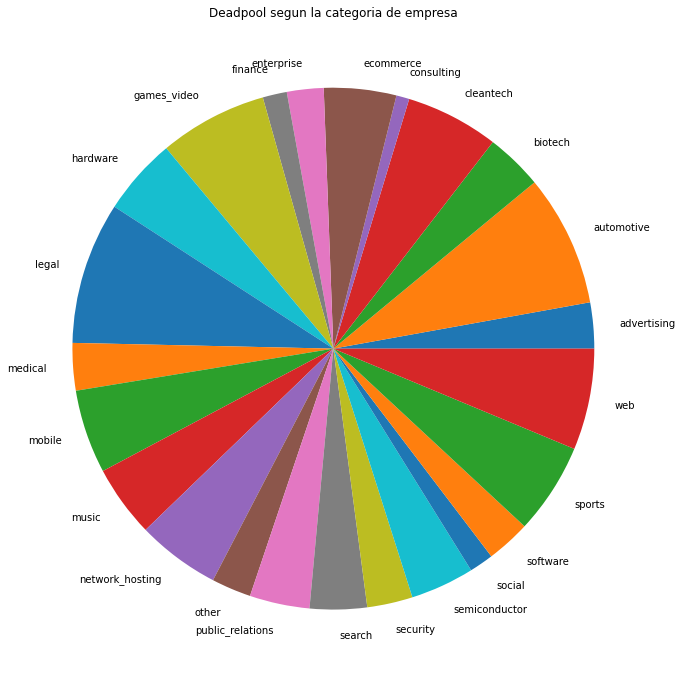

In [247]:
plt.figure(figsize=(12,12))
plt.pie(yy, labels = mylabels)
plt.title("Deadpool segun la categoria de empresa")

plt.show()

In [ ]:
 # De las 42 tipos de empresas displonibles la que tiene mayor numero de misma categoria es la wev, la que ha tenido mayor tiendas
# muertos es la categoria legal la automotriz, la game, y la web. Quien ha tenido menod Deadpool ha sido la de finansas
# consultoras. De las 17 empresas mcon menos numero en la categoria se encuentra la de finanzas.


In [254]:
df_size = df.sort_values(by='number_of_employees', ascending=False)
df_size

,name,category_code,number_of_employees,founded_year,deadpooled_year,description,total_money_raised,Dead
5776,Siemens,hardware,405000.0,1847.0,0.0,Electronics and Electrical Engineering,$8.9M,0
2016,IBM,software,388000.0,1896.0,0.0,,$0,0
8105,Toyota,enterprise,320000.0,1933.0,0.0,Automotive,$0,0
255,PayPal,finance,300000.0,1998.0,0.0,Internet payment service,$197M,0
13172,Nippon Telegraph and Telephone Corporation,0,227000.0,1985.0,0.0,,$0,0
...,...,...,...,...,...,...,...,...
10377,teambits,software,0.0,2008.0,0.0,Collaboration and Interactive Software,$0,0
10378,PG Job Site Pro,software,0.0,2008.0,0.0,0,$0,0
2725,Logix,0,0.0,0.0,0.0,0,$0,0
10383,QOOP,ecommerce,0.0,0.0,0.0,0,$0,0


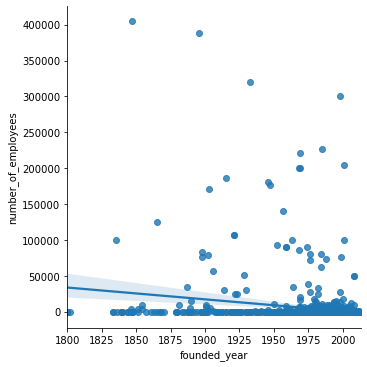

In [262]:
ds = df_size.copy()
#ds = ds.drop(df[df['number_of_employees']==0].index)
ds = ds.drop(df[df['founded_year']==0].index)
#your code-1st way
sns.lmplot(x='founded_year',y='number_of_employees', data=ds,fit_reg=True) 
plt.show()
#En la siguiente grafica se observa que existen alguno valores muestraque al  ser mas antigua existen mayor numero de 
#empleados.12. La mayoria de empresas tiene mnos de 50 mil empleados.

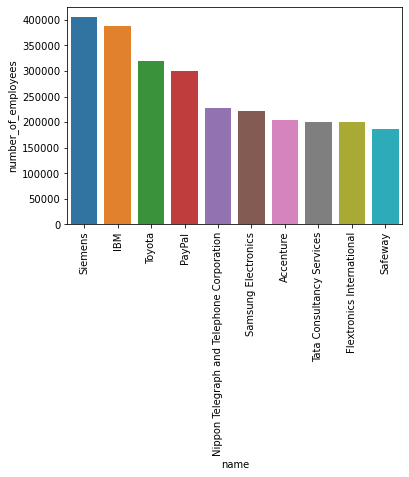

In [267]:
 
ax = sns.barplot(x='name',y='number_of_employees', data=ds[:10])

plt.xticks(rotation=90)
plt.show()
#La empresa con mayor numero de empleado es Siemens, IBM, y Toyota.

In [275]:
cat_founded = ds[13100:]
ds = cat_founded.drop(cat_founded[cat_founded['category_code']==0].index)

In [283]:
ds['Money_raised'] =   np.where(ds['total_money_raised'] !='$0', 1,0)

In [284]:
ds

,name,category_code,number_of_employees,founded_year,deadpooled_year,description,total_money_raised,Dead,Money_raised
2738,RealMatch,advertising,0.0,2004.0,0.0,Recruitment Ad Networks,$11.7M,0,1
2746,Messagenet,mobile,0.0,1995.0,0.0,SMS messaging solutions,$0,0,0
2754,blogads,web,0.0,2002.0,0.0,Blog Advertising,$0,0,0
10288,CrownPeak,software,0.0,2001.0,0.0,content management,$10.3M,0,1
10292,Refinery29,fashion,0.0,2004.0,0.0,,$30.4M,0,1
10294,OwnerIQ,advertising,0.0,2006.0,0.0,Path-to-purchase media,$28.3M,0,1
10301,Air2Web,mobile,0.0,1999.0,0.0,mobile to web platform,$25M,0,1
10303,Matter Network,cleantech,0.0,2008.0,0.0,CleanTech Media Company,$0,0,0
10313,Sprout - Growing Ideas,other,0.0,1999.0,0.0,,$0,0,0
10304,Ridespring,software,0.0,2005.0,0.0,Corporate SaaS Commute Program,$0,0,0


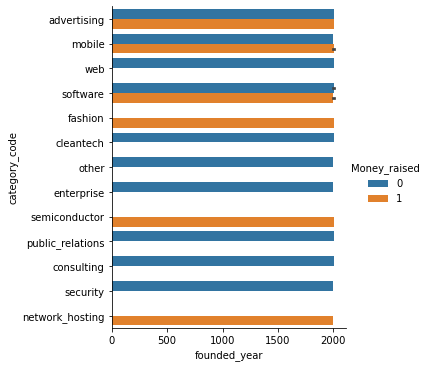

In [287]:
ds
g = sns.catplot( x="founded_year",y="category_code",
                hue="Money_raised", 
                data=ds, kind="bar",
            );

#La empresasn con menos empleados, de estas se tiene aquellas categorias que raisea money,  en este caso finanzas 
#y analitics no aparecen.

In [4]:
cliente = pymongo.MongoClient()

In [5]:
cliente.list_database_names()

['admin', 'companies', 'config', 'local']

In [6]:
db = cliente.companies
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies')

In [7]:
db.collection_names()

<ipython-input-7-8ff4d2505e25>:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  db.collection_names()


['collection', 'o', 'companies']

In [8]:
colec = db.companies

In [9]:
colec

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies'), 'companies')

In [10]:
oficinas = colec.find({'offices':{'$not':{'$size':0}}},
                         {'name':True,'_id':0, 'offices':1})

In [11]:
data = list(oficinas)
data 

[{'name': 'Wetpaint',
  'offices': [{'description': '',
    'address1': '710 - 2nd Avenue',
    'address2': 'Suite 1100',
    'zip_code': '98104',
    'city': 'Seattle',
    'state_code': 'WA',
    'country_code': 'USA',
    'latitude': 47.603122,
    'longitude': -122.333253},
   {'description': '',
    'address1': '270 Lafayette Street',
    'address2': 'Suite 505',
    'zip_code': '10012',
    'city': 'New York',
    'state_code': 'NY',
    'country_code': 'USA',
    'latitude': 40.7237306,
    'longitude': -73.9964312}]},
 {'name': 'AdventNet',
  'offices': [{'description': 'Headquarters',
    'address1': '4900 Hopyard Rd.',
    'address2': 'Suite 310',
    'zip_code': '94588',
    'city': 'Pleasanton',
    'state_code': 'CA',
    'country_code': 'USA',
    'latitude': 37.692934,
    'longitude': -121.904945}]},
 {'name': 'Zoho',
  'offices': [{'description': 'Headquarters',
    'address1': '4900 Hopyard Rd',
    'address2': 'Suite 310',
    'zip_code': '94588',
    'city': 'Pleasa

In [12]:
df = pd.DataFrame(data)
df

,name,offices
0,Wetpaint,"[{'description': '', 'address1': '710 - 2nd Av..."
1,AdventNet,"[{'description': 'Headquarters', 'address1': '..."
2,Zoho,"[{'description': 'Headquarters', 'address1': '..."
3,Digg,"[{'description': None, 'address1': '135 Missis..."
4,Facebook,"[{'description': 'Headquarters', 'address1': '..."
...,...,...
13739,Oriact,"[{'description': '', 'address1': 'LÃ¤rchenweg ..."
13740,Adhunk,"[{'description': 'Indian Office', 'address1': ..."
13741,AfterLogic,"[{'description': 'Livingston', 'address1': 'P...."
13742,EnteGreat Solutions,"[{'description': '', 'address1': '', 'address2..."


In [13]:
lista_data = [json_normalize(i) for i in df['offices']]

<ipython-input-13-45671e5abef9>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  lista_data = [json_normalize(i) for i in df['offices']]


In [14]:
lista_data[0]

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253
1,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431


In [15]:
lista_nombres = list(df['name'])
lista_nombres

['Wetpaint',
 'AdventNet',
 'Zoho',
 'Digg',
 'Facebook',
 'Omnidrive',
 'Postini',
 'Geni',
 'Flektor',
 'Fox Interactive Media',
 'Twitter',
 'StumbleUpon',
 'Gizmoz',
 'Scribd',
 'Slacker',
 'Lala',
 'Helio',
 'eBay',
 'MeetMoi',
 'Joost',
 'CBS',
 'Viacom',
 'Babelgum',
 'Plaxo',
 'Cisco',
 'Yahoo!',
 'Powerset',
 'Technorati',
 'SpinVox',
 'AddThis',
 'OpenX',
 'Mahalo',
 'Sparter',
 'Kyte',
 'Veoh',
 'Gannett',
 'Thoof',
 'Jingle Networks',
 'Info',
 'JotSpot',
 'Meetup',
 'Mercora',
 'NetRatings',
 'LifeLock',
 'Wesabe',
 'Jangl SMS',
 'SmugMug',
 'Prosper',
 'Google',
 'Jajah',
 'Skype',
 'YouTube',
 'Stickam',
 'blogTV',
 'Livestream',
 'Ustream',
 'AdaptiveBlue',
 'Pando Networks',
 'Intel',
 'GrandCentral',
 'Ikan',
 'delicious',
 'Topix',
 'Jobster',
 'Pownce',
 'Revision3',
 'AllPeers',
 'CriticalMetrics',
 'ZenZui',
 'Spock',
 'Wize',
 'SodaHead',
 'CastTV',
 'iSkoot',
 'EQO',
 'AllofMP3',
 'There',
 'SellABand',
 'Funny Or Die',
 'Steorn',
 'iContact',
 'MeeVee',
 'blink

In [16]:
print(len(lista_nombres), len(lista_data))

13744 13744


In [17]:
zip_nombre_df = list(zip(lista_nombres,lista_data))
zip_nombre_df

[('Wetpaint',
    description              address1    address2 zip_code      city state_code  \
  0                  710 - 2nd Avenue  Suite 1100    98104   Seattle         WA   
  1              270 Lafayette Street   Suite 505    10012  New York         NY   
  
    country_code   latitude   longitude  
  0          USA  47.603122 -122.333253  
  1          USA  40.723731  -73.996431  ),
 ('AdventNet',
      description          address1   address2 zip_code        city state_code  \
  0  Headquarters  4900 Hopyard Rd.  Suite 310    94588  Pleasanton         CA   
  
    country_code   latitude   longitude  
  0          USA  37.692934 -121.904945  ),
 ('Zoho',
      description         address1   address2 zip_code        city state_code  \
  0  Headquarters  4900 Hopyard Rd  Suite 310    94588  Pleasanton         CA   
  
    country_code   latitude   longitude  
  0          USA  37.692934 -121.904945  ),
 ('Digg',
    description            address1 address2 zip_code           cit

In [18]:
concat_df = pd.DataFrame()

In [19]:
for i in zip_nombre_df:
    i[1]['company'] = i[0]

In [20]:
for i in range(len(zip_nombre_df)):
    concat_df = pd.concat([concat_df,zip_nombre_df[i][1]])

In [21]:
concat_df

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,company
0,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253,Wetpaint
1,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431,Wetpaint
0,Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945,AdventNet
0,Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945,Zoho
0,None,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523,Digg
...,...,...,...,...,...,...,...,...,...,...
0,,LÃ¤rchenweg 7,,6403,KÃ¼ssnacht,None,CHE,47.088219,8.437163,Oriact
0,Indian Office,Near Tube Well(south),Patel Nagar,334003,Bikaner,None,IND,NaN,NaN,Adhunk
0,Livingston,P.O. Box 2096,,07039,Livingston,NJ,USA,40.793024,-74.323554,AfterLogic
0,,,,,Birmingham,AL,USA,33.518885,-86.816068,EnteGreat Solutions


In [24]:
df_2 = pd.DataFrame(var)
df_2.rename(columns={'name': 'company'}, inplace=True)
df_2

,company,category_code,number_of_employees,founded_year,deadpooled_year,description,total_money_raised
0,Wetpaint,web,47.0,2005.0,1.0,Technology Platform Company,$39.8M
1,AdventNet,enterprise,600.0,1996.0,2.0,Server Management Software,$0
2,Zoho,software,1600.0,2005.0,3.0,Online Business Apps Suite,$0
3,Digg,news,60.0,2004.0,NaN,user driven social content website,$45M
4,Facebook,social,5299.0,2004.0,NaN,Social network,$2.43B
...,...,...,...,...,...,...,...
18796,Adhunk,advertising,3.0,2009.0,NaN,Online Admanager,$0
18797,AfterLogic,software,NaN,2002.0,NaN,.NET Email Components and Webmail,$0
18798,goBookmaker,web,NaN,NaN,NaN,Create your own sportsbook,$0
18799,EnteGreat Solutions,software,NaN,NaN,NaN,,$0


In [108]:
merge_office = pd.merge(concat_df, df_2,on ='company', how="inner")
merge_office.head()

,description_x,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,company,category_code,number_of_employees,founded_year,deadpooled_year,description_y,total_money_raised
0,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253,Wetpaint,web,47.0,2005.0,1.0,Technology Platform Company,$39.8M
1,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431,Wetpaint,web,47.0,2005.0,1.0,Technology Platform Company,$39.8M
2,Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945,AdventNet,enterprise,600.0,1996.0,2.0,Server Management Software,$0
3,Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945,Zoho,software,1600.0,2005.0,3.0,Online Business Apps Suite,$0
4,None,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523,Digg,news,60.0,2004.0,NaN,user driven social content website,$45M


In [26]:
merge_office
merge_office["USA"] = np.where(merge_office['country_code'] =='USA', 1,0)
merge_office["NoN-USA"] = np.where(merge_office['country_code'] !='USA', 1,0)
 

In [27]:
us = merge_office["USA"].agg("sum")

In [28]:
nonus = merge_office["NoN-USA"].agg("sum")

In [29]:
11147/(11147+7070)
# El 60% de las compañias se encuentran en estados unidos.


0.6119009716199154

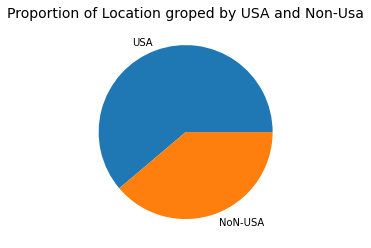

In [30]:
labels = 'USA' , 'NoN-USA'
x =[11147,7070]
plt.pie(x=x,labels=labels, pctdistance=0.5)
plt.title("Proportion of Location groped by USA and Non-Usa", fontsize=14);
# El 61% de el total de las empresas son del pasi USA.

In [31]:
vehicles_mean = merge_office[["USA", "category_code"]].groupby(["USA", "category_code"]).agg("count")


In [32]:
u = merge_office.groupby([ "category_code",'USA'])["category_code"].count()
d = pd.DataFrame(u)
d =d.unstack()

d

category_code        
USA                          0       1
category_code                         
advertising              443.0   694.0
analytics                 26.0    83.0
automotive                 4.0     7.0
biotech                   89.0   286.0
cleantech                105.0   234.0
consulting               346.0   428.0
design                     3.0     3.0
ecommerce                276.0   403.0
education                  4.0    41.0
enterprise               320.0   616.0
fashion                    2.0    10.0
finance                   25.0    47.0
games_video              413.0   627.0
government                 1.0     NaN
hardware                 180.0   304.0
health                     4.0    30.0
hospitality                6.0    10.0
legal                      8.0    39.0
local                      1.0     NaN
manufacturing              6.0    16.0
medical                    3.0    24.0
messaging                 19.0    28.0
mobile                   625.0   584.0
music                     19.0    32.0
nanotech                   NaN     5.0
network_hosting          240.0   397.0
news                      20.0    45.0
nonprofit                  NaN     3.0
other                    425.0   588.0
photo_video                7.0    28.0
public_relations         250.0   323.0
real_estate                2.0     7.0
search                   221.0   198.0
security                  45.0   160.0
semiconductor             58.0   139.0
social                    18.0    50.0
software                1398.0  1911.0
sports                     3.0    10.0
transportation             2.0    24.0
travel                    13.0    22.0
web                     1204.0  2165.0

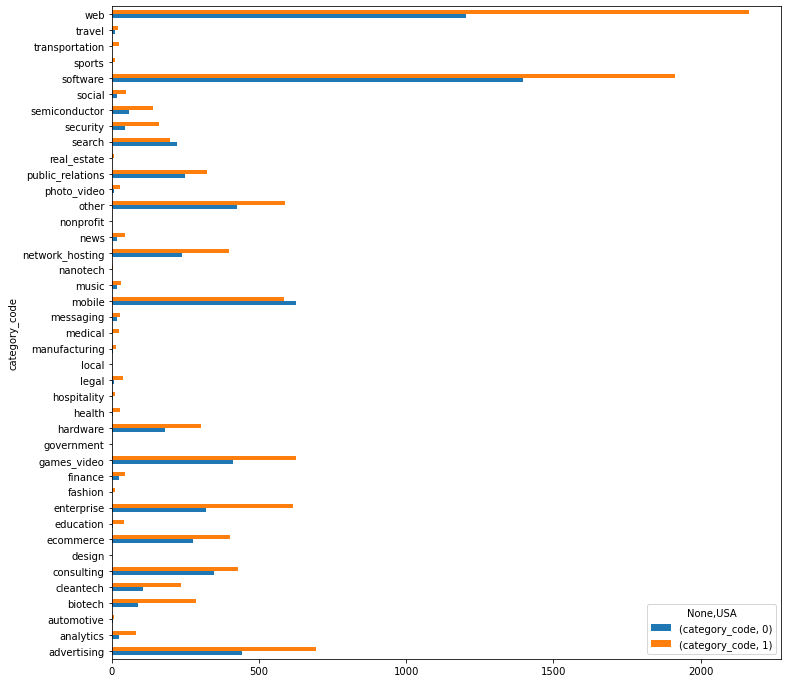

Empty DataFrame
Columns: []
Index: [(0, advertising), (0, analytics), (0, automotive), (0, biotech), (0, cleantech), (0, consulting), (0, design), (0, ecommerce), (0, education), (0, enterprise), (0, fashion), (0, finance), (0, games_video), (0, government), (0, hardware), (0, health), (0, hospitality), (0, legal), (0, local), (0, manufacturing), (0, medical), (0, messaging), (0, mobile), (0, music), (0, network_hosting), (0, news), (0, other), (0, photo_video), (0, public_relations), (0, real_estate), (0, search), (0, security), (0, semiconductor), (0, social), (0, software), (0, sports), (0, transportation), (0, travel), (0, web), (1, advertising), (1, analytics), (1, automotive), (1, biotech), (1, cleantech), (1, consulting), (1, design), (1, ecommerce), (1, education), (1, enterprise), (1, fashion), (1, finance), (1, games_video), (1, hardware), (1, health), (1, hospitality), (1, legal), (1, manufacturing), (1, medical), (1, messaging), (1, mobile), (1, music), (1, nanotech), (1, network_hosting), (1, news), (1, nonprofit), (1, other), (1, photo_video), (1, public_relations), (1, real_estate), (1, search), (1, security), (1, semiconductor), (1, social), (1, software), (1, sports), (1, transportation), (1, travel), (1, web)]

[78 rows x 0 columns]

In [33]:
d.plot.barh(figsize=(12,12))
plt.show()
vehicles_mean
#En la mayor parte de categorias la cantidad de empreas de USA ganan excepto en search, y mobile.

In [34]:
y = merge_office.describe()

In [35]:
# En las estadisticas descriptivamos observamos que el promedior del numero de empleados es 1280, el minimo 0 con 133 empresas
#que tienen este numero de empleados y el maximo 405,000 Siemen, en Munich una empresa de hardware fundada en 1847.

#De los 18 millones registro se tiene 15 millones que registran el año fundado en promedio las empresas registradas tienen
#un año promedio de 2001 las mas recientes fueron fundada en el 2013, estas empresas fueron 11. La mas antiguea fue
#creada en 1800, esta fueron dos una en Sigapore y otra en Auckland .

#El maximo de deadpooed year fue en el 2013 y el propmedio en 2001.

In [96]:
L = (merge_office[merge_office['country_code'] == 'USA' ])
u = L.groupby([ "category_code","city"])["category_code"].count()
d = pd.DataFrame(u)
d =d.unstack()
d = d.fillna(0)


In [103]:
corr =merge_office.corr()
corr

,latitude,longitude,number_of_employees,founded_year,deadpooled_year
latitude,1.000000,-0.251379,0.006727,0.000071,-0.016452
longitude,-0.251379,1.000000,0.007009,0.008064,0.039898
number_of_employees,0.006727,0.007009,1.000000,-0.355138,-0.478855
founded_year,0.000071,0.008064,-0.355138,1.000000,0.076334
deadpooled_year,-0.016452,0.039898,-0.478855,0.076334,1.000000


<AxesSubplot:>

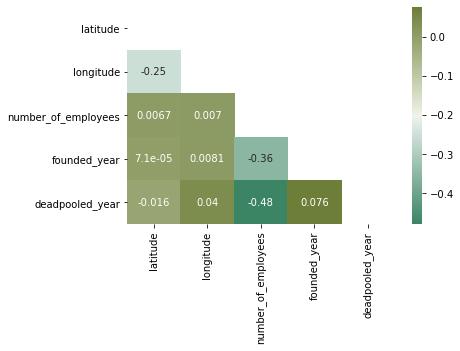

In [104]:
# Draw the heatmap with the mask and correct aspect ratio
mask = np.triu(np.ones_like(corr, dtype = np.bool))
cmap = sns.diverging_palette(150, 100, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, mask = mask)
#Se obtienen las correlaciones , se muestra las variables ocn mayo correlación es el dead_pool yer y el numero de
#empleados-
#Existe un ligera  correlación como ya habiamos visto del año fundado y numeros de empleados.

In [105]:
merge_office.describe(include='object')
#La compañia con mayor aparición Gooogle(nombre de la compañia) , la ciudad , San franciso. El codigo web.

,description_x,address1,address2,zip_code,city,state_code,country_code,company,category_code,description_y,total_money_raised
count,16414,17998,17812,18006,18117,10943,18217,18217,17455,13991,18217
unique,3450,12861,3701,6534,3125,52,114,13123,41,7099,1442
top,,,,,San Francisco,CA,USA,Google,web,,$0
freq,4902,2373,10319,2414,1004,4291,11147,67,3369,3432,11745


In [107]:
merge_office.to_excel('companies.xlsx', engine='xlsxwriter')

In [130]:
L.to_excel('L.xlsx')

In [119]:
from PIL import Image 

In [126]:
disable_check_xsrf = True

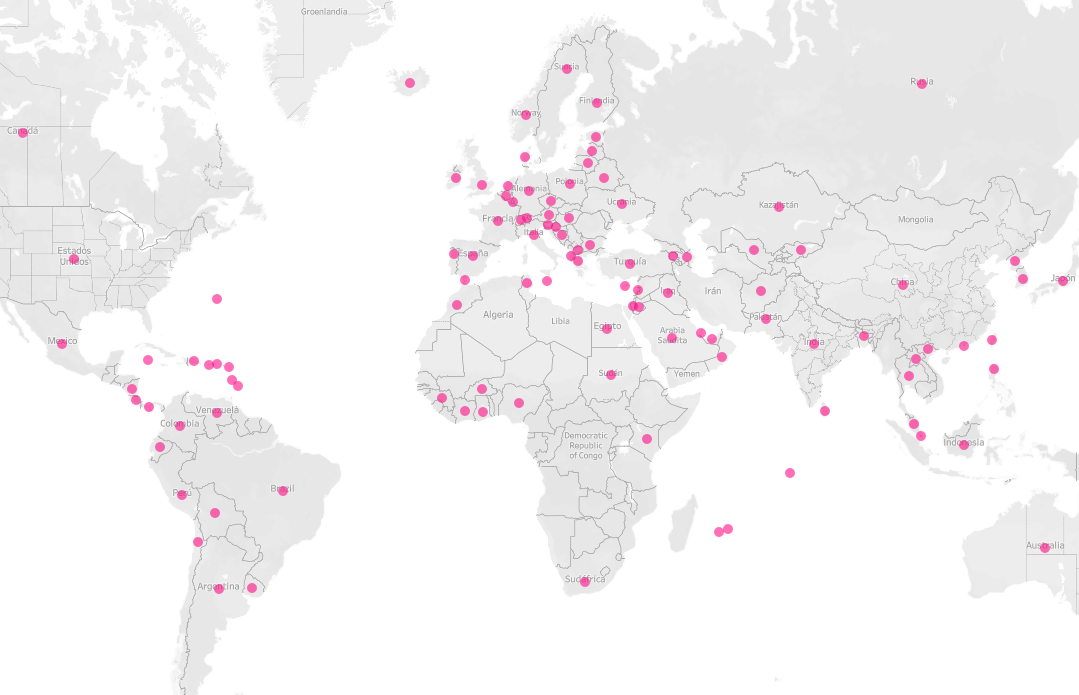

In [127]:
img = Image.open("./mapa1.PNG")
img
#country code

#La distribución de los paises considerados

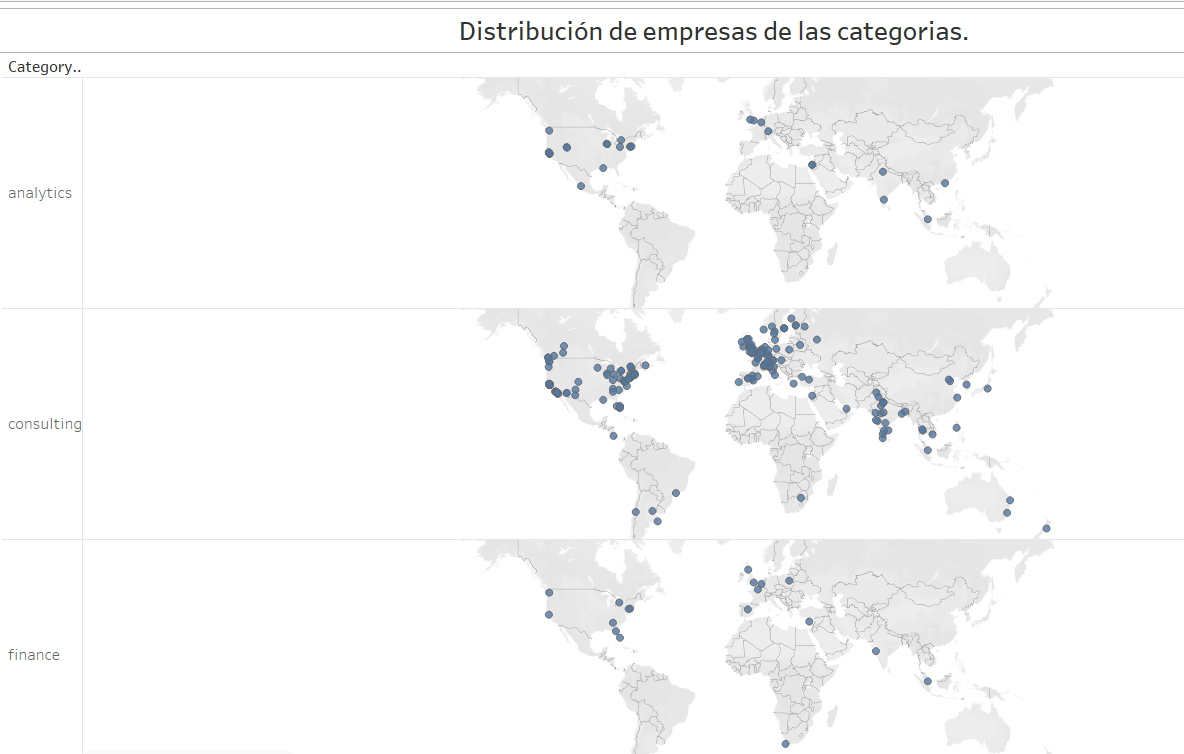

In [128]:
img1 = Image.open("./cat.PNG")
img1
#country code
#Al final escogeria una empresa de cualquiera de estas categorias porque se encuentra en niveles muy bajode 
#de haber tenido añs de quiebra y son de las empresas con menor cantidad segunr su categoria.
#No existe tanta competencia.

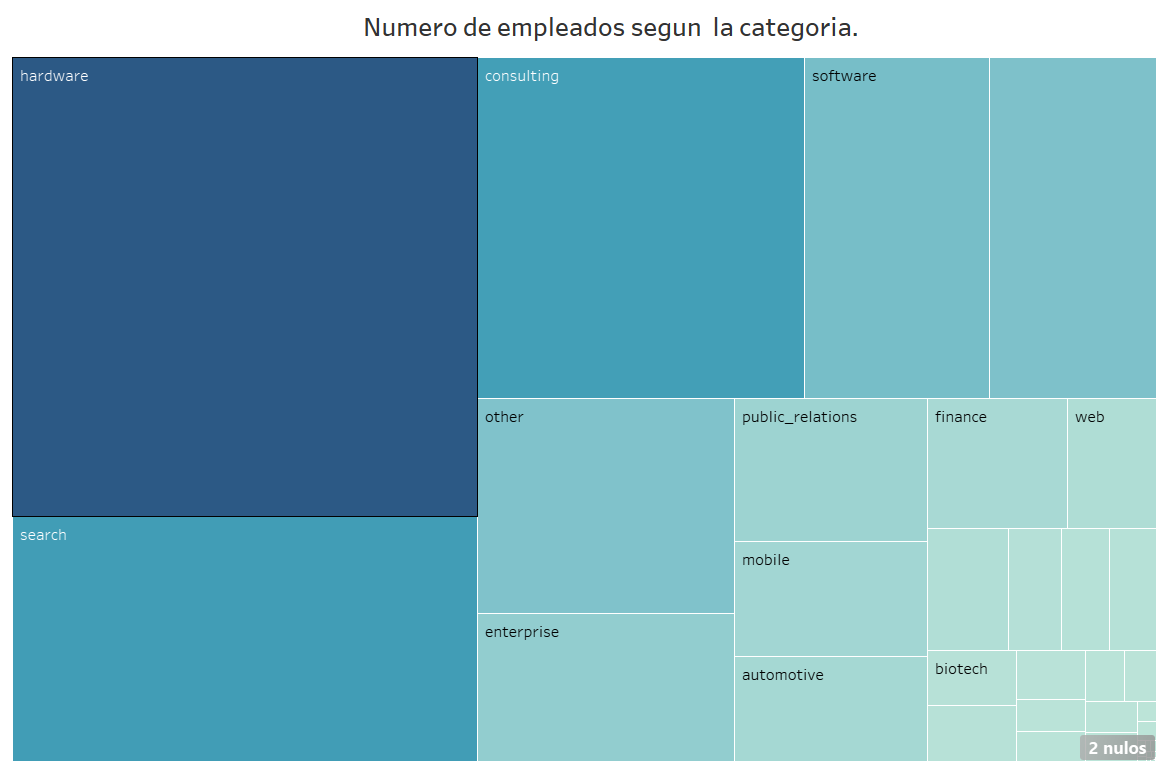

In [129]:

img2 = Image.open("./Numemp.PNG")
img2
#El numero de empleados se tiene la mayor cantidad de empleados hardware, y consulting y en niveles medios se encuentra finance
#lo cual por su correlación negativa, al tener mas empleados se tiene menor probilidad de quiebra.

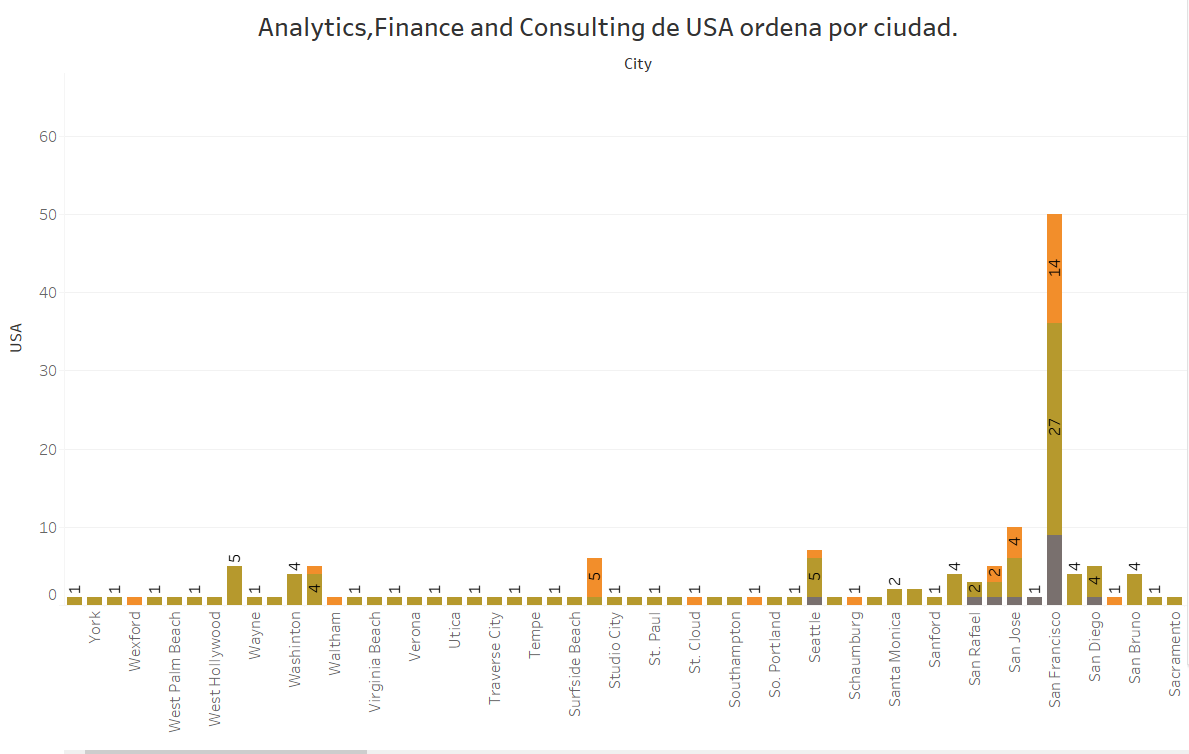

In [131]:
img = Image.open("./aor.PNG")
img
#En relación con la  pondria en un lugar de usa porque esta base de datos tien mayor información de USA por cual podria
#tomar una desición con mayor certitud en una ciudad.
#Aqui se muestran la 3 categorias qu en las ciudades donde tiene menos empresas de esa categoria .
#Mi intervalor de lugar seria aquellas ciudads que solo tienen de una  empresa o 0 empresas de Finanzas analitics y consultoria.
